In [37]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import sklearn
import nltk
import plotly.express as px

In [4]:
vad = pd.read_csv("VAD_Dataframe.csv", index_col = 0)
data = pd.read_csv("Data.csv", index_col = 0)
# print(vad.head())
#print(data.head())
print(data.iloc[1])
test = data.iloc[1]

clean_stems    joy guide alway com when we are too attached o...
clean_tweet    joy guides always come attached need ask guide...
ijoy                                                           1
Name: 5883, dtype: object


In [11]:
#Create a function that takes in a sentence string and computes the total valence, arousal, dominance scores
#Will lso need to make sure we know if this is a joy tweet or not (keep track of ijoy)
#Return a dictionary of these total scores

#print(test['clean_stems'])
tokenizer = nltk.RegexpTokenizer(r"\w+")
words_st = tokenizer.tokenize(test['clean_stems'])
words = tokenizer.tokenize(test['clean_tweet'])
#vad_words = tokenizer.tokenize(vad['Term'])
print(words_st)
        

['joy', 'guide', 'alway', 'com', 'when', 'we', 'are', 'too', 'attached', 'or', 'need', 'a', 'ask', 'your', 'guide', 'by', 'sonia', 'choquett', 'for', 'mor']


In [9]:
#Function to get the total of Valence Arousal Dominance
def vad_totals(words):
    v, a, d = 0, 0,0
    i = 0
    words = tokenizer.tokenize(words)
    while i < len(words):
        j = 0
        while j < len(vad['Term']):
            if words[i] == vad['Term'][j]:
                #print(vad.iloc[j])
                x = vad.iloc[j]
                v = v+x[1]
                a = v+x[2]
                d = v+x[3]
            j = j+1
        i +=1
    return(v, a, d) 

In [12]:
#Note the difference between clean_tweet and the stems. Always changes to alway (but niether in VAD)    
#come changes to com - so this one is not counted
#however, guides changes to guide and then it is counted - significant score difference between the two 
print(vad_totals(test['clean_tweet']))
print(vad_totals(test['clean_stems']))

(3.1119999999999997, 3.5519999999999996, 3.5709999999999997)
(4.355, 4.670000000000001, 4.9750000000000005)


In [41]:
#Fix Function and loop over enitire data
i = 18100 
dat = list(data["clean_tweet"])
l = len(dat)
#print(dat[0])
#vad_scores = []
while i < l:    
    if str(dat[i]) == "nan":
        vad_scores.append([dat[i], 0, 0, 0])
    else:
        x = vad_totals(dat[i])
        vad_scores.append([dat[i], x[0], x[1], x[2]])
    print(i)
    i +=1
    
        

18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18153
18154
18155
18156
18157
18158
18159
18160
18161
18162
18163
18164
18165
18166
18167
18168
18169
18170
18171
18172
18173
18174
18175
18176
18177
18178
18179
18180
18181
18182
18183
18184
18185
18186
18187
18188
18189
18190
18191
18192
18193
18194
18195
18196
18197
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225


In [14]:
#position 479
#260153,🔥🔥🔥,🔥🔥🔥,0  ---> this is what the tweet looked like in Data.csv
#these tweets were only emojis - probably a comment on someone's tweet
#vad_scores.append(["nan", 0, 0, 0])
print(dat[20])

absolutely joy felt listening watching perform indescribable song beautiful voice like dream✨ blessed song thank jimin💜 2yearswithserendipity


In [85]:
##This is a test until I have the full data
# It is the first 100 tweets in the data (they have joy in them)
#and the last 125 tweets (they do not have joy in them)
df = pd.DataFrame(vad_scores, columns = ["Tweet", "V", "A", "D"])
#print(df.tail())
joy = data['ijoy']
joy = joy.reset_index(drop = True)

#testing first 100 examples
test = joy[0:100]
test1 = joy[18100:]
test = pd.concat([test, test1], axis=0) 
df["Joy"] = test
df["Joy"] = df["Joy"].fillna(0)
df['Joy'] = df['Joy'].replace([1.0],'Joy')
df['Joy'] = df['Joy'].replace([0.0],'NoJoy')
print(df.head())
df.to_csv("TestVAD.csv")

                                               Tweet      V      A      D  Joy
0  scenes weekend progress lincolnpark new build ...  7.790  8.614  8.584  Joy
1  joy guides always come attached need ask guide...  3.112  3.552  3.571  Joy
2  asked anything name ask receive joy completejo...  2.824  3.648  3.618  Joy
3           things bring joy finding new anime binge  4.151  4.801  4.651  Joy
4  miss luca much really constant source joy ’ be...  4.359  4.753  5.109  Joy


In [73]:
# perform PCA on the test data
#In essence, it computes a matrix that represents the variation of your data (covariance matrix/eigenvectors)
#and rank them by their relevance (explained variance/eigenvalues)

features = ["V", "A", "D"]
pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["Joy"]
)
#The diagonal just shows the PC1 vs. PC1 which is a straight line since they are the same (correlation=1)
fig.update_traces(diagonal_visible=False)
fig.show()

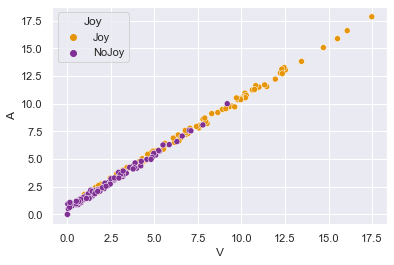

In [84]:
#Other plot
#VAD original scores are from 0 to 1, should we change to -1 to 1?
x, y = pd.Series(df["V"], name="Valence"), pd.Series(df["A"], name="Arousal")
sns.set_theme(color_codes=True)
ax = sns.scatterplot(data = df, x= "V", y="A", marker="o", hue="Joy", palette = "CMRmap_r")
#This graph looks very positively correlated and linear --> is this factual or due to the scale?